In [34]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [35]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,162.628411,3083,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-06-23,Calumet,NaN
1,538.273165,3192,"{'type': 'Point', 'coordinates': [-87.6545, 41...",2017-06-23,Osterman,290.3
2,1386.880673,3190,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-06-23,Montrose,NaN
3,5393.683435,3205,"{'type': 'Point', 'coordinates': [-87.5748, 41...",2017-06-23,63rd Street,NaN
4,203.749847,3191,"{'type': 'Point', 'coordinates': [-87.6515, 41...",2017-06-23,Foster,275.0


In [36]:
# Reminder that there are some beaches that don't have predictions
list(beach_days.loc[beach_days['predicted_level'].isnull()]['beach_name'].unique())

['Calumet', 'Montrose', '63rd Street', 'Rainbow', 'Humboldt', 'South Shore']

In [37]:
# Pick a beach to analyze
print("Available beaches: " + ', '.join(beach_days['beach_name'].unique()))
selected_beach_name = 'Margaret T Burroughs (31st)'
print("Analyzing " + selected_beach_name)

Available beaches: Calumet, Osterman, Montrose, 63rd Street, Foster, Rainbow, Marion Mahony Griffin (Jarvis), Humboldt, Rogers, 12th Street, Oak Street, South Shore, Margaret T Burroughs (31st), Howard, Leone, Oakwood, North Avenue, 57th Street, Hartigan (Albion), Ohio Street
Analyzing Margaret T Burroughs (31st)


In [38]:
beach = beach_days.loc[beach_days['beach_name'] == selected_beach_name]
beach.head()

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
12,988.658182,3207,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-23,Margaret T Burroughs (31st),330.4
21,283.971830,3119,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-22,Margaret T Burroughs (31st),65.0
53,1732.965089,3069,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-21,Margaret T Burroughs (31st),246.2
74,35.213634,3066,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-20,Margaret T Burroughs (31st),462.7
87,334.200539,3051,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-19,Margaret T Burroughs (31st),364.1


In [39]:
first_day = beach_days.sort_values('date', ascending=True).iloc[0]['date']
today = datetime.now().date()
delta = today - first_day
dates = pd.DataFrame([(first_day + timedelta(days=i)) for i in range(delta.days + 1)])
dates.columns = ['date']
beach_by_day = dates.merge(beach, how='left', on='date')
beach_by_day.head()

,date,dna_reading_mean,dna_test_id,location,beach_name,predicted_level
0,2017-05-26,11.489125,2307.0,"{'type': 'Point', 'coordinates': [-87.6072, 41...",Margaret T Burroughs (31st),184.6
1,2017-05-26,11.489125,2307.0,"{'type': 'Point', 'coordinates': [-87.6072, 41...",Margaret T Burroughs (31st),184.6
2,2017-05-27,NaN,NaN,NaN,NaN,NaN
3,2017-05-28,68.161573,2330.0,"{'type': 'Point', 'coordinates': [-87.6072, 41...",Margaret T Burroughs (31st),96.6
4,2017-05-29,129.011627,2339.0,"{'type': 'Point', 'coordinates': [-87.6072, 41...",Margaret T Burroughs (31st),197.7


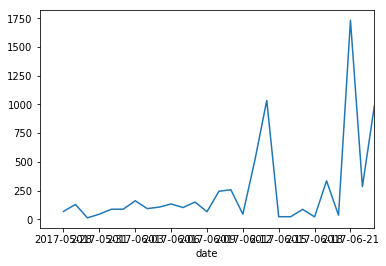

In [41]:
beach_by_day.set_index('date')['dna_reading_mean'].plot(kind="line")

In [53]:
# How many days of samples were taken
print("Samples were taken across %s days" % len(beach_days['date'].unique()))

Samples were taken across 29 days


In [23]:
print("There are %s total beach-days, and %s unique predictions" %
     (str(len(beach_days)), str(len(beach_days.loc[~beach_days['predicted_level'].isnull()]))))

There are 573 total beach-days, and 399 unique predictions


In [35]:
print("There were %s samples predicted above the threshold, and %s that actually were" %
     (str(len(beach_days.loc[beach_days['predicted_level'] > 1000])),
      str(len(beach_days.loc[beach_days['dna_reading_mean'] > 1000]))))

There were 0 samples predicted above the threshold, and 41 that actually were


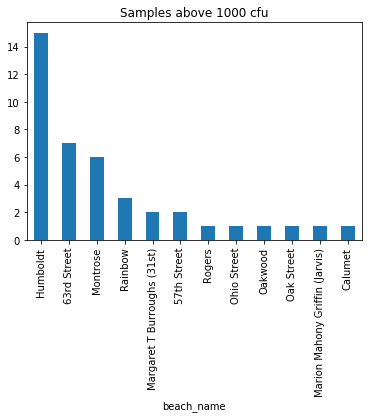

In [36]:
# For the DNA testing, the threshold for an advisory is 1000 CFU.  How many beaches exceed that?
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('beach_name').count()['date']\
    .sort_values(ascending=False).plot(kind="bar", title="Samples above 1000 cfu")

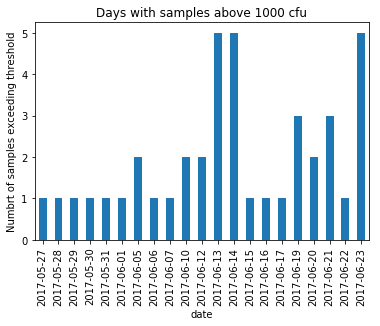

In [31]:
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('date').count()['location']\
    .plot(kind="bar", title="Days with samples above 1000 cfu").set_ylabel("Numbrt of samples exceeding threshold")

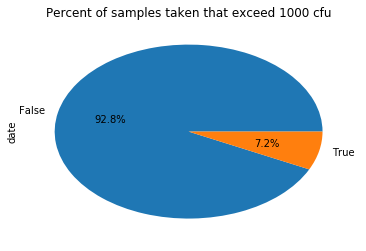

In [52]:
# Samples that exceed threshold
beach_days['dna_exceeds'] = beach_days['dna_reading_mean'] > 1000
beach_days.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')